<a href="https://colab.research.google.com/github/Normal-case/DeepLearning/blob/master/MNIST_DNN_tf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np
tf.enable_eager_execution()
print(tf.__version__)

1.15.2


In [4]:
from tensorflow.examples.tutorials.mnist import input_data
# input_data.read_data_sets()
# 텐서플로우에 기본 내장된 mnist 이미지 데이터를 다운로드 합니다.
# 다운로드 한 이미지의 내용을 읽어 들일 객체를 리턴합니다.
# /mnist/data/ : MNIST를 다운로드 할 폴더
# one_hot = True : one_hot 옵션은 레이블을 one_hot 방식의 데이터로 만들어줍니다.
# mnist 변수 : MNIST 이미지를 읽어서 리턴 할 객체
mnist = input_data.read_data_sets('./mnist/data/', one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [5]:
X, y = mnist.train.next_batch(1)

In [6]:
X

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [7]:
y

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [8]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

In [10]:
X.shape

(1, 784)

In [11]:
X.reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

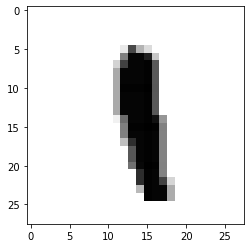

In [15]:
# 이미지 사진 그리기 28 x 28로 맞춰야함
# cmap = plt.cm.gray_r은 흑백 설정
plt.imshow(X.reshape(28, 28), cmap = plt.cm.gray_r)

In [16]:
initializer = tf.contrib.layers.xavier_initializer()
w0 = tf.Variable(initializer([784, 200]))
b0 = tf.Variable(initializer([200]))
w1 = tf.Variable(initializer([200, 10]))
b1 = tf.Variable(initializer([10]))

In [17]:
X, y = mnist.train.next_batch(10)
hypothesis0 = tf.sigmoid(tf.matmul(X, w0) + b0)
hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1)

In [18]:
# MNIST 전체 이미지수 : 55000
mnist.train.num_examples

55000

In [19]:
'''
전체 데이터 55000개의 이미지를 한 번에 학습하기에는 메모리 소요가 많으므로
100개씩 나눠서 550번 학습을 진행
'''
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)
print('total_batch =', total_batch) # 반복 횟수

total_batch = 550


In [20]:
optimizer = tf.train.AdamOptimizer(0.001)

In [23]:
for step in range(11):
  total_cost = 0 # 전체 오차

  for i in range(total_batch):
    X, y = mnist.train.next_batch(batch_size)
    with tf.GradientTape() as tape:
      hypothesis0 = tf.sigmoid(tf.matmul(X, w0) + b0)
      hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1)
      cost = -tf.reduce_sum(y * tf.log(hypothesis1)) / len(hypothesis1)
      grads = tape.gradient(cost, [w0, w1, b0, b1])
    
    optimizer.apply_gradients(grads_and_vars = zip(grads, [w0, w1, b0, b1]))
    total_cost += cost
  print('step: {}, cost: {}'.format(step, total_cost/total_batch))

step: 0, cost: 0.5215479135513306
step: 1, cost: 0.2562814950942993
step: 2, cost: 0.2017558515071869
step: 3, cost: 0.16621215641498566
step: 4, cost: 0.13913515210151672
step: 5, cost: 0.1181698888540268
step: 6, cost: 0.10190440714359283
step: 7, cost: 0.08811292052268982
step: 8, cost: 0.07708294689655304
step: 9, cost: 0.06721705943346024
step: 10, cost: 0.05906304717063904


In [24]:
test_images = mnist.test.images
test_labels = mnist.test.labels
hypothesis0 = tf.sigmoid(tf.matmul(test_images, w0) + b0)
predict = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1)
predict01 = tf.argmax(predict, 1)
target = tf.argmax(test_labels, 1)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predict01, target), dtype = tf.float32))
print('accuracy')
print(accuracy.numpy())

accuracy
0.9737


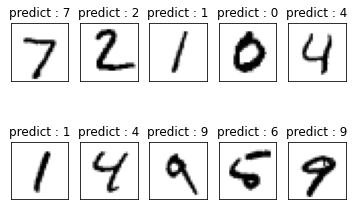

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()

for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('predict : %d'% predict01[i])
  subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap = plt.cm.gray_r)

plt.show()